## Imports

In [1]:
import pandas as pd
import sys

sys.path.insert(0,'../')

from postprocess import *

## Interaction data processing

In [2]:
# For SATORI based interactions
#df = pd.read_csv('../Results/Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')

# For FIS based interactions
df = pd.read_csv('../Results/Arabidopsis_GenomeWide_Analysis_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Filter based on interaction and motif hit p-values, and keep the most significant interactions

In [3]:
df = filter_data_on_thresholds(df, motifA_pval_cutoff=0.05, motifB_pval_cutoff=0.05)

In [4]:
df.shape

(1906, 12)

In [5]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval
5,filter0<-->filter12,11,TCP_tnt.TCP1_col_a_m1,0.021122,G2like_tnt.AT2G40260_colamp_a_m1,0.010394,141.0,157.0,378.0,676.0,0.000999,0.004951
40,filter0<-->filter82,81,TCP_tnt.TCP1_col_a_m1,0.021122,G2like_tnt.AT2G40260_colamp_a_m1,0.013137,186.0,24.0,699.0,1046.0,0.001348,0.006336
47,filter0<-->filter94,93,TCP_tnt.TCP1_col_a_m1,0.021122,Trihelix_tnt.AT1G76880_col_a_m1,0.041459,513.0,95.0,633.0,1037.0,0.007607,0.026373
53,filter0<-->filter102,101,TCP_tnt.TCP1_col_a_m1,0.021122,ZFHD_tnt.ATHB23_col_b_m1,0.002463,453.0,421.0,607.0,993.0,0.002164,0.009348
71,filter0<-->filter132,131,TCP_tnt.TCP1_col_a_m1,0.021122,HB_tnt.ATHB40_col_a_m1,0.011440,189.0,22.0,371.0,622.0,0.000016,0.000166


### Annotate the interacting motifs

In [6]:
df['TF1'] = df['motif1'].apply(lambda x: x.split('_')[1].strip('.tnt'))
df['TF2'] = df['motif2'].apply(lambda x: x.split('_')[1].strip('.tnt'))

In [7]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2
5,filter0<-->filter12,11,TCP_tnt.TCP1_col_a_m1,0.021122,G2like_tnt.AT2G40260_colamp_a_m1,0.010394,141.0,157.0,378.0,676.0,0.000999,0.004951,TCP1,AT2G40260
40,filter0<-->filter82,81,TCP_tnt.TCP1_col_a_m1,0.021122,G2like_tnt.AT2G40260_colamp_a_m1,0.013137,186.0,24.0,699.0,1046.0,0.001348,0.006336,TCP1,AT2G40260
47,filter0<-->filter94,93,TCP_tnt.TCP1_col_a_m1,0.021122,Trihelix_tnt.AT1G76880_col_a_m1,0.041459,513.0,95.0,633.0,1037.0,0.007607,0.026373,TCP1,AT1G76880
53,filter0<-->filter102,101,TCP_tnt.TCP1_col_a_m1,0.021122,ZFHD_tnt.ATHB23_col_b_m1,0.002463,453.0,421.0,607.0,993.0,0.002164,0.009348,TCP1,ATHB23
71,filter0<-->filter132,131,TCP_tnt.TCP1_col_a_m1,0.021122,HB_tnt.ATHB40_col_a_m1,0.011440,189.0,22.0,371.0,622.0,0.000016,0.000166,TCP1,ATHB40


In [8]:
df['TF_Interaction'] = df.apply(lambda x: x['TF1']+r'$\longleftrightarrow$'+x['TF2'], axis=1)

### Drop same motif interactions

In [9]:
df = df[df['TF1']!=df['TF2']]

In [10]:
df.shape

(1730, 15)

In [11]:
df = df.reset_index(drop=True)

### Fix redundant interaction pairs

In [12]:
df = process_for_redundant_interactions(df, intr_type='TF')

In [13]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction
0,filter0<-->filter12,11,TCP_tnt.TCP1_col_a_m1,0.021122,G2like_tnt.AT2G40260_colamp_a_m1,0.010394,141.0,157.0,378.0,676.0,0.000999,0.004951,TCP1,AT2G40260,TCP1$\longleftrightarrow$AT2G40260
1,filter0<-->filter82,81,TCP_tnt.TCP1_col_a_m1,0.021122,G2like_tnt.AT2G40260_colamp_a_m1,0.013137,186.0,24.0,699.0,1046.0,0.001348,0.006336,TCP1,AT2G40260,TCP1$\longleftrightarrow$AT2G40260
2,filter0<-->filter94,93,TCP_tnt.TCP1_col_a_m1,0.021122,Trihelix_tnt.AT1G76880_col_a_m1,0.041459,513.0,95.0,633.0,1037.0,0.007607,0.026373,TCP1,AT1G76880,TCP1$\longleftrightarrow$AT1G76880
3,filter0<-->filter102,101,TCP_tnt.TCP1_col_a_m1,0.021122,ZFHD_tnt.ATHB23_col_b_m1,0.002463,453.0,421.0,607.0,993.0,0.002164,0.009348,TCP1,ATHB23,TCP1$\longleftrightarrow$ATHB23
4,filter0<-->filter132,131,TCP_tnt.TCP1_col_a_m1,0.021122,HB_tnt.ATHB40_col_a_m1,0.011440,189.0,22.0,371.0,622.0,0.000016,0.000166,TCP1,ATHB40,TCP1$\longleftrightarrow$ATHB40


In [14]:
df.shape

(1730, 15)

## Most Frequent TF Family Interactions

In [15]:
df['TF1_Family'] = df['motif1'].apply(lambda x: x.split('_')[0])
df['TF2_Family'] = df['motif2'].apply(lambda x: x.split('_')[0])

In [16]:
df['Family_Interaction'] = df.apply(lambda x: x['TF1_Family']+r'$\longleftrightarrow$'+x['TF2_Family'],axis=1)

In [17]:
df = process_for_redundant_interactions(df, intr_type='Family')

In [18]:
df.head()

,filter_interaction,example_no,motif1,motif1_qval,motif2,motif2_qval,mean_distance,mean_distance_bg,num_obs,num_obs_bg,pval,adjusted_pval,TF1,TF2,TF_Interaction,TF1_Family,TF2_Family,Family_Interaction
0,filter0<-->filter12,11,TCP_tnt.TCP1_col_a_m1,0.021122,G2like_tnt.AT2G40260_colamp_a_m1,0.010394,141.0,157.0,378.0,676.0,0.000999,0.004951,TCP1,AT2G40260,TCP1$\longleftrightarrow$AT2G40260,TCP,G2like,TCP$\longleftrightarrow$G2like
1,filter0<-->filter82,81,TCP_tnt.TCP1_col_a_m1,0.021122,G2like_tnt.AT2G40260_colamp_a_m1,0.013137,186.0,24.0,699.0,1046.0,0.001348,0.006336,TCP1,AT2G40260,TCP1$\longleftrightarrow$AT2G40260,TCP,G2like,TCP$\longleftrightarrow$G2like
2,filter0<-->filter94,93,TCP_tnt.TCP1_col_a_m1,0.021122,Trihelix_tnt.AT1G76880_col_a_m1,0.041459,513.0,95.0,633.0,1037.0,0.007607,0.026373,TCP1,AT1G76880,TCP1$\longleftrightarrow$AT1G76880,TCP,Trihelix,TCP$\longleftrightarrow$Trihelix
3,filter0<-->filter102,101,TCP_tnt.TCP1_col_a_m1,0.021122,ZFHD_tnt.ATHB23_col_b_m1,0.002463,453.0,421.0,607.0,993.0,0.002164,0.009348,TCP1,ATHB23,TCP1$\longleftrightarrow$ATHB23,TCP,ZFHD,TCP$\longleftrightarrow$ZFHD
4,filter0<-->filter132,131,TCP_tnt.TCP1_col_a_m1,0.021122,HB_tnt.ATHB40_col_a_m1,0.011440,189.0,22.0,371.0,622.0,0.000016,0.000166,TCP1,ATHB40,TCP1$\longleftrightarrow$ATHB40,TCP,HB,TCP$\longleftrightarrow$HB


### Distribution of individual TF or TF family interactions

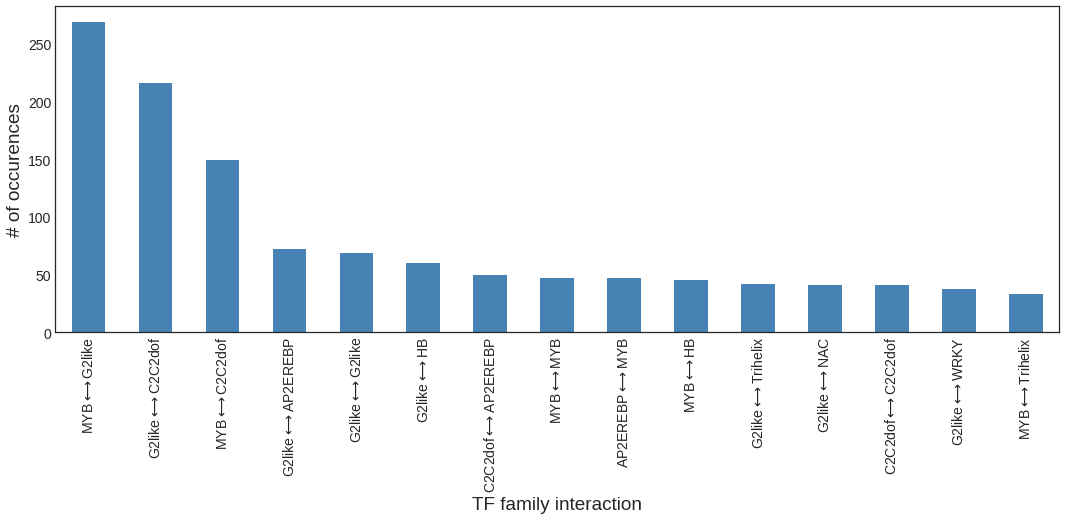

In [19]:
plot_frequent_interactions(df, intr_level='Family_Interaction', first_n=15)

### Plot interaction distance distribution

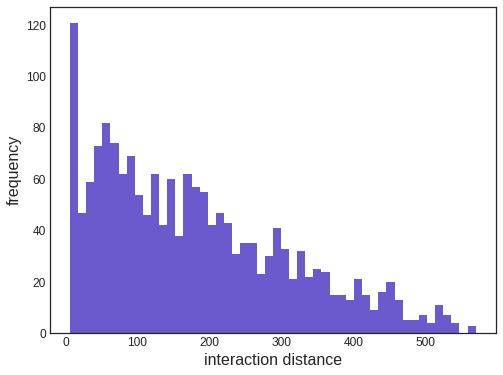

In [20]:
plot_interaction_distance_distribution(df, nbins=50, fig_size=(8,6))

### Most frequent interactions and their respective interaction distances

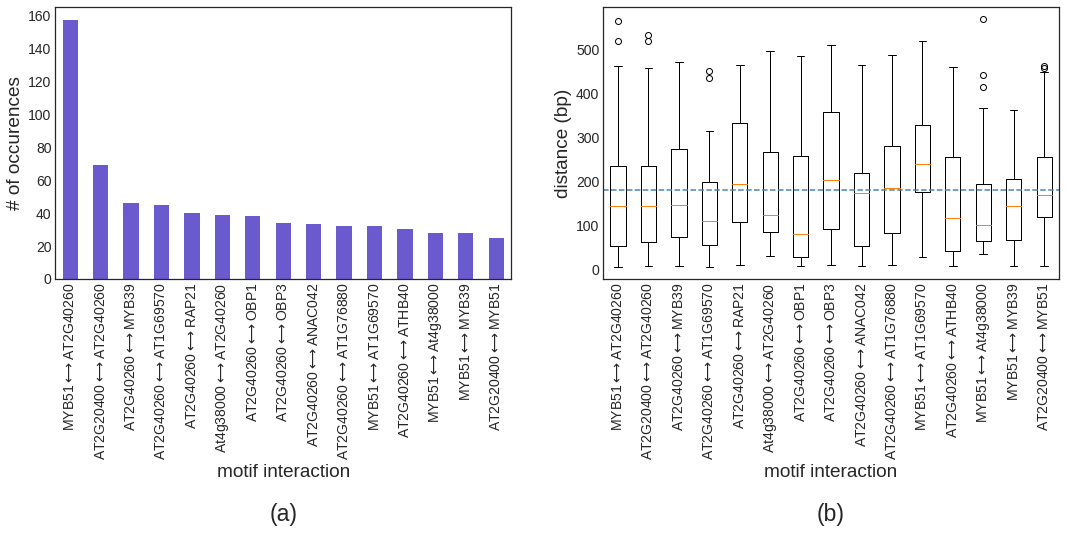

In [21]:
plot_interactions_and_distances_boxplot(df, first_n=15, sort_distances=False, add_sub_caption=True, show_mean_dist=True, dist_color='slateblue', cap_pos=[0.5, -0.89])

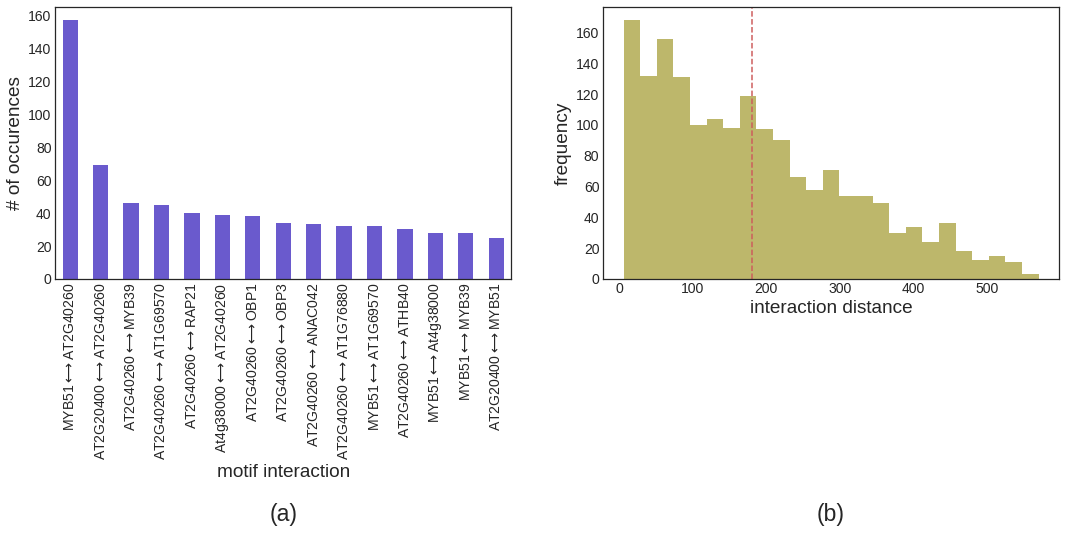

In [22]:
plot_interactions_and_distances_histogram(df, first_n=15, dist_nbins=25, add_sub_caption=True, show_mean_dist=True, dist_colors=['slateblue', 'darkkhaki'], cap_pos=[0.5, -0.89])